## MP3 Report Plots

In [37]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

pd.set_option('display.float_format', lambda x: '%e' % x)

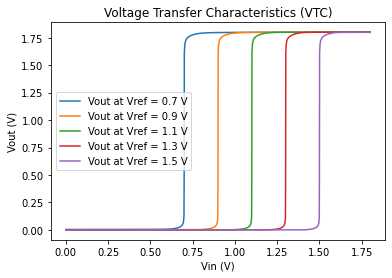

In [99]:
vtc = pd.read_csv('final_VTC.csv')
fig, ax = plt.subplots()
vtc['Vout at Vref = 0.7 V'] = vtc['Vout'].iloc[:1801]
vtc['Vout at Vref = 0.9 V'] = vtc['Vout'].iloc[1802:3601]
vtc['Vout at Vref = 1.1 V'] = vtc['Vout'].iloc[3604:5402]
vtc['Vout at Vref = 1.3 V'] = vtc['Vout'].iloc[5405:7203]
vtc['Vout at Vref = 1.5 V'] = vtc['Vout'].iloc[7206:]

vtc.plot(x = 'Vin', y = 'Vout at Vref = 0.7 V', ax = ax)
vtc.plot(x = 'Vin', y = 'Vout at Vref = 0.9 V', ax = ax)
vtc.plot(x = 'Vin', y = 'Vout at Vref = 1.1 V', ax = ax)
vtc.plot(x = 'Vin', y = 'Vout at Vref = 1.3 V', ax = ax)
vtc.plot(x = 'Vin', y = 'Vout at Vref = 1.5 V', ax = ax, title = 'Voltage Transfer Characteristics (VTC)')
plt.xlabel('Vin (V)')
plt.ylabel('Vout (V)')
plt.savefig("VTC_plot.svg", format="svg")

nan


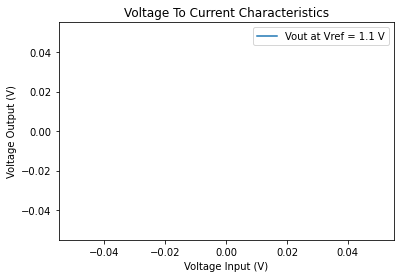

In [138]:
fig, ax = plt.subplots()
vtc.iloc[6702:6804].plot(x='Vin', y='Vout at Vref = 1.1 V', ax = ax, title = 'Voltage To Current Characteristics')
plt.xlabel('Voltage Input (V)')
plt.ylabel('Voltage Output (V)')
Gm = (vtc['Vout at Vref = 1.1 V'].iloc[6704] - vtc['Vout at Vref = 1.1 V'].iloc[4702])/(vtc['Vin'].iloc[4704] - vtc['Vin'].iloc[4702])
print(Gm)

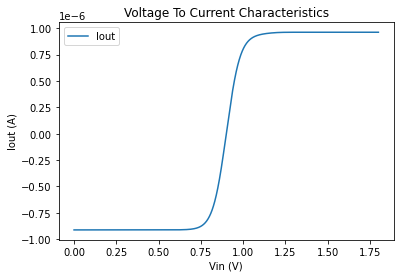

In [57]:
v_i = pd.read_csv('final_VtoI.csv')
fig, ax = plt.subplots()
v_i.plot(x='Vin', y='Iout', ax = ax, title = 'Voltage To Current Characteristics')
plt.xlabel('Vin (V)')
plt.ylabel('Iout (A)')
plt.savefig("VtoI_plot.svg", format="svg")

1.119042499999999e-05


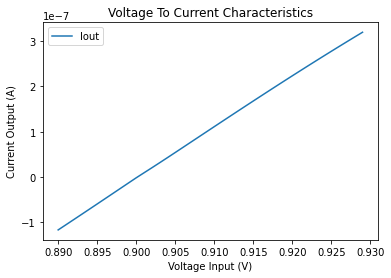

In [51]:
fig, ax = plt.subplots()
v_i.iloc[890:930].plot(x='Vin', y='Iout', ax = ax, title = 'Voltage To Current Characteristics')
plt.xlabel('Voltage Input (V)')
plt.ylabel('Current Output (A)')
Gm = (v_i['Iout'].iloc[930] - v_i['Iout'].iloc[890])/(v_i['Vin'].iloc[930] - v_i['Vin'].iloc[890])
print(Gm)

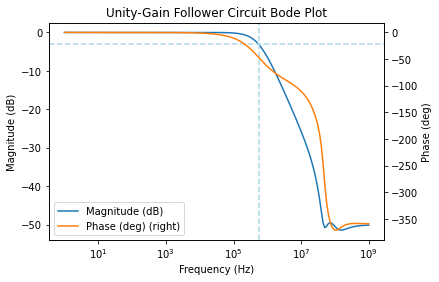

In [40]:
unity_gain = pd.read_csv('final_unity_gain.csv')
unity_gain['Magnitude (dB)'] = unity_gain['Magnitude (dB)']
unity_gain['Phase (deg)'] = np.unwrap(unity_gain['Phase (deg)'], period=360)
fig, ax = plt.subplots()
ax.set_xscale('log')

unity_gain.plot(x='Frequency (Hz)', y='Magnitude (dB)', ax = ax)
plt.axhline(y = -3, color = 'lightblue', linestyle = '--') # <== tune to find Gain margin
plt.axvline(x = 5.5*10**5, color = 'lightblue', linestyle = '--') 
plt.ylabel('Magnitude (dB)')

unity_gain.plot(x='Frequency (Hz)', y='Phase (deg)', ax = ax, secondary_y = True, title = 'Unity-Gain Follower Circuit Bode Plot')
plt.ylabel('Phase (deg)')
plt.savefig("unity_gain_plot.svg", format="svg")

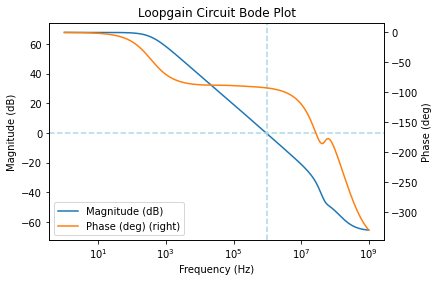

In [41]:
loop_gain = pd.read_csv('final_loopgain.csv')
loop_gain['Frequency (Hz)'] = loop_gain['frequency']
loop_gain['Magnitude (dB)'] = loop_gain['tmag']
loop_gain['Phase (deg)'] = np.unwrap(loop_gain['tphase'], period=360)

fig, ax = plt.subplots()
ax.set_xscale('log')

loop_gain.plot(x='Frequency (Hz)', y='Magnitude (dB)', ax = ax)
plt.axhline(y = 0, color = 'lightblue', linestyle = '--') # <== tune to find Gain margin
plt.axvline(x = 10**6, color = 'lightblue', linestyle = '--') 
plt.ylabel('Magnitude (dB)')

loop_gain.plot(x='Frequency (Hz)', y='Phase (deg)', ax = ax, secondary_y = True, title = 'Loopgain Circuit Bode Plot')
plt.ylabel('Phase (deg)')
plt.savefig("loopgain_plot.svg", format="svg")

2426.6100950824166


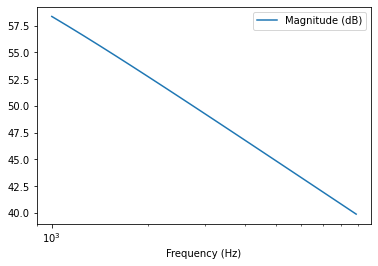

In [132]:
fig, ax = plt.subplots()
ax.set_xscale('log')

loop_gain.iloc[60:80].plot(x='Frequency (Hz)', y='Magnitude (dB)', ax = ax)
gain = 10 ** (67.7/20)
print(gain)